In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import os, sys
sys.path.append(os.path.join("..","src"))
from image_stack import image1d, image2d
from image_stack.basis_functions import BasisFunctions
from image_stack.statistics import InformationCriteria, information_criterion
from image_stack.focal import FocalPlane
from image_stack.canvas import plot_image, plot_image_through_focus

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


too many values to unpack (expected 2)
too many values to unpack (expected 2)


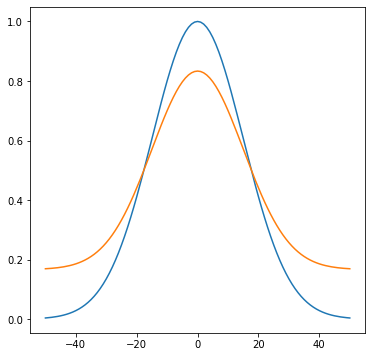

In [3]:
def gaussian_no_normalisation(x, mean, std_dev):
    return np.exp( -(x-mean)**2/(0.5*std_dev**2))

x = np.linspace(-100., 100., 201)
data1 = gaussian_no_normalisation(x, 0, 30)*0.6 + 0.2
data2 = gaussian_no_normalisation(x, 0, 30)*0.4 + 0.3
data_all = np.vstack([data1, data2]).T

x2 = np.linspace(-150., 150., 301)
data_lower = np.ones(x2.shape)*0.2
data_upper = np.ones(x2.shape)*0.8
image_stack = image1d.ImageStack1D(data_all, x, np.array([0., 1.]))
image_stack.set_mask('window','edge', 50.)
"""
jj = 0
for ii, x_val in enumerate(image.x):
    if image.mask.current[ii]:
        print(x_val, image.mask.current[ii], image.masked_data[ii], image.data[ii], image.masked_data.compressed()[jj])
        jj += 1
    else:
        print(x_val, image.mask.current[ii], image.masked_data[ii], image.data[ii])
     
print(image.data[image.mask.current])
print(image.masked_data.compressed())
"""

image_lower = image1d.Image1D(data_lower, x2, 0.)
image_upper = image1d.Image1D(data_upper, x2, 0.)
image_lower.set_mask("window","edge",50.)
image_upper.set_mask("window","edge",50.)

image_stack.normalise_reference_images(image_upper, image_lower)

fig, ax0 = plt.subplots(1, 1, figsize=(6,6))
plt.sca(ax0)
plot_image(ax0, image_stack.slice_z(z_index=0))
plot_image(ax0, image_stack.slice_z(z_index=1))


In [18]:
image_stack.to_file("test")

(201, 2)
(201,)
(2,)
too many values to unpack (expected 2)
too many values to unpack (expected 2)


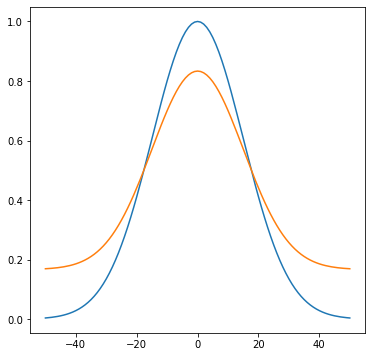

In [20]:
loaded_image = image1d.ImageStack1D.from_file("test.npz")
fig, ax0 = plt.subplots(1, 1, figsize=(6,6))
plt.sca(ax0)
plot_image(ax0, loaded_image.slice_z(z_index=0))
plot_image(ax0, loaded_image.slice_z(z_index=1))

too many values to unpack (expected 2)
too many values to unpack (expected 2)


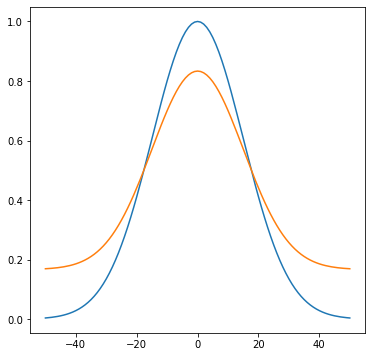

In [7]:
def gaussian_no_normalisation(x, mean, std_dev):
    return np.exp( -(x-mean)**2/(0.5*std_dev**2))

x = np.linspace(-100., 100., 201)
data1 = gaussian_no_normalisation(x, 0, 30)*0.6 + 0.2
data2 = gaussian_no_normalisation(x, 0, 30)*0.4 + 0.3
data_all = np.vstack([data1, data2]).T

x2 = np.linspace(-150., 150., 301)
data_lower = np.ones(x2.shape)*0.2
data_lower = np.vstack([data_lower, data_lower]).T

data_upper = np.ones(x2.shape)*0.8
data_upper = np.vstack([data_upper, data_upper]).T
image_stack = image1d.ImageStack1D(data_all, x, np.array([0., 1.]))
image_stack.set_mask('window','edge', 50.)
"""
jj = 0
for ii, x_val in enumerate(image.x):
    if image.mask.current[ii]:
        print(x_val, image.mask.current[ii], image.masked_data[ii], image.data[ii], image.masked_data.compressed()[jj])
        jj += 1
    else:
        print(x_val, image.mask.current[ii], image.masked_data[ii], image.data[ii])
     
print(image.data[image.mask.current])
print(image.masked_data.compressed())
"""
image_stack_lower = image1d.ImageStack1D(data_lower, x2, np.array([0., 1.]))
image_stack_upper = image1d.ImageStack1D(data_upper, x2, np.array([0., 1.]))
image_stack_lower.set_mask("window","edge",50.)
image_stack_upper.set_mask("window","edge",50.)

image_stack.normalise_reference_image_stacks(image_stack_upper, image_stack_lower)

fig, ax0 = plt.subplots(1, 1, figsize=(6,6))
plt.sca(ax0)
plot_image(ax0, image_stack.slice_z(z_index=0))
plot_image(ax0, image_stack.slice_z(z_index=1))

too many values to unpack (expected 2)


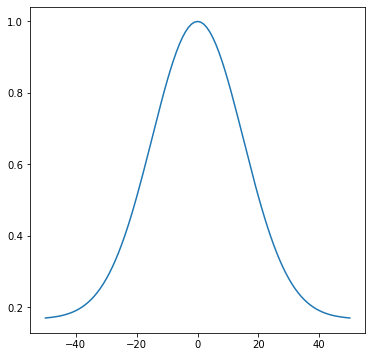

In [8]:
def gaussian_no_normalisation(x, mean, std_dev):
    return np.exp( -(x-mean)**2/(0.5*std_dev**2))

x = np.linspace(-100., 100., 201)
data1 = gaussian_no_normalisation(x, 0, 30)*0.6 + 0.2
data1 = gaussian_no_normalisation(x, 0, 30)*0.5 + 0.3
data_all = np.vstack([data1, data2])
x2 = np.linspace(-150., 150., 301)
data_lower = np.ones(x2.shape)*0.2
data_upper = np.ones(x2.shape)*0.8
image = image1d.Image1D(data1, x, 0.)
image.set_mask('window','edge', 50.)
"""
jj = 0
for ii, x_val in enumerate(image.x):
    if image.mask.current[ii]:
        print(x_val, image.mask.current[ii], image.masked_data[ii], image.data[ii], image.masked_data.compressed()[jj])
        jj += 1
    else:
        print(x_val, image.mask.current[ii], image.masked_data[ii], image.data[ii])
     
print(image.data[image.mask.current])
print(image.masked_data.compressed())
"""
image_lower = image1d.Image1D(data_lower, x2, 0.)
image_upper = image1d.Image1D(data_upper, x2, 0.)
image_lower.set_mask("window","edge",50.)
image_upper.set_mask("window","edge",50.)

image.normalise_reference_images(image_upper, image_lower)

fig, ax0 = plt.subplots(1, 1, figsize=(6,6))
plt.sca(ax0)
plot_image(ax0, image)

0.0019011806912597377
0.00451298305913096
(201, 141)
[-60.]
(141,)
focus estimate1: -59.36331435436972
5
45.51070274215869 -59.36331435436972
2
n modes:  2
focus estimate1: -53.95570130235841


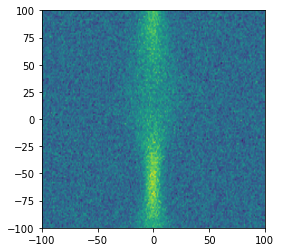

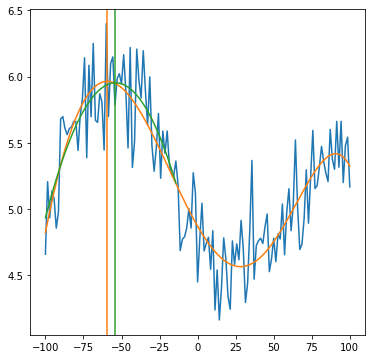

In [9]:
def gaussian(x, mean, std_dev):
    return (1/(std_dev*np.sqrt(2*np.pi**2)))*np.exp( -(x-mean)**2/(0.5*std_dev**2))


x = np.linspace(-100., 100., 201)
z = np.linspace(-100., 100., 141)

g1 = gaussian(x, 0, 40)
print(np.std(g1))

g2 = gaussian(x, 0, 10)
print(np.std(g2))


std_per_z1 = (np.abs(np.linspace(-3, 5, 81)))**2 + 10.
std_per_z2 = (np.abs(np.linspace(5, 2, 60)))**2 + 10.

std_per_z = np.hstack([std_per_z1, std_per_z2])



data = np.zeros((x.size, z.size))
for iz, z_val in enumerate(z):
    data[:, iz] = 1000*gaussian(x, 0, std_per_z[iz]) + np.random.normal(0, 4, x.size)
#data = gaussian(x, 0., 10.)
print(data.shape)
#z = 0.
image1 = image1d.ImageStack1D(data, x, z)
#image1.set_mask('window','edge', 50.)
fig, ax0 = plt.subplots(1, 1, figsize=(4, 4))
#plot_image(ax0, image1)
plot_image_through_focus(ax0, image1)

fig, ax0 = plt.subplots(1, 1, figsize=(6,6))
plt.sca(ax0)
plt.plot(image1.z, image1.std())
print(image1.z[np.where(np.isclose(image1.std(),np.max(image1.std())))[0]])
#plane_pos = image1.determine_focal_plane()

z = image1.z
data = image1.std()
print(data.shape)
focal_fitter = FocalPlane(z, data, model='polynomial')
focus_estimate1 = focal_fitter.fit(plot=True)[0]
print("focus estimate1: {}".format(focus_estimate1))
plt.axvline(focus_estimate1, color='tab:orange')
print(focal_fitter.model.n_parameters)
fit_window_width = focal_fitter.optimize_fit_window()
print(fit_window_width, focal_fitter.current_focus_estimate)
print(focal_fitter.model.n_parameters)
focus_estimate2 = focal_fitter.fit(fit_window=fit_window_width, fit_center=focal_fitter.current_focus_estimate,
                       plot=True)[0]
print("n modes: ",focal_fitter.model.n_parameters)
#print(focal_fitter.model.parameters)
print("focus estimate1: {}".format(focus_estimate2))
plt.axvline(focus_estimate2, color='tab:green')

45.51070274215869 -59.36331435436972
-53.95570130235841
42.2123379332235 -56.38221925784794
-54.20415291477789


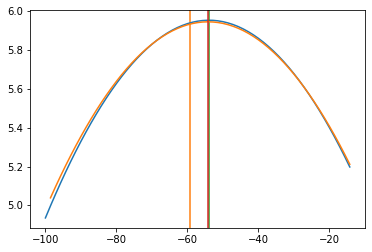

In [10]:
plt.axvline(focus_estimate1, color='tab:orange')
fit_window_width = focal_fitter.optimize_fit_window()
print(fit_window_width, focal_fitter.current_focus_estimate)
focus_estimate2 = focal_fitter.fit(fit_window=fit_window_width, fit_center=focal_fitter.current_focus_estimate,
                       plot=True)[0]

print(focus_estimate2)
plt.axvline(focus_estimate2, color='tab:green')

fit_window_width = focal_fitter.optimize_fit_window(iterations=2)
print(fit_window_width, focal_fitter.current_focus_estimate)
focus_estimate3 = focal_fitter.fit(fit_window=fit_window_width,fit_center=focal_fitter.current_focus_estimate,
                       plot=True)[0]

print(focus_estimate3)
plt.axvline(focus_estimate3, color='tab:red')

In [29]:
my_dict = {'c2':0.0003835547037041318, 'c1': -0.028209913704438493, 'c0': 2.8363782654418666, 'c5': -1.8425324160828827e-10, 'c4': -3.3293428079452686e-08, 'c3': 4.93598010957863e-06}
for tag, coeff in my

{'c2': 0.0003835547037041318, 'c1': -0.028209913704438493, 'c0': 2.8363782654418666, 'c5': -1.8425324160828827e-10, 'c4': -3.3293428079452686e-08, 'c3': 4.93598010957863e-06}


[  5.74094051  13.14668624  17.42552872  19.46412984  22.79244385
  32.1017957   30.48953625  45.63290489  48.88915212  54.36900384
  57.26702669  61.88050644  64.25440263  69.35711096  75.71354215
  85.73865192  91.35482783  97.85697354 101.36771938 116.64109515
 118.24247174 123.03472526 124.58032723 126.21777534 130.08128992
 134.51625588 138.95523834 140.57304411 146.30634038 149.11490575
 155.36784666 157.63123297 163.04456304 162.34244775 172.50124293
 174.42660163 180.17790801 185.29224442 193.7682388  195.62861589
 199.48165455 201.35898327 209.16893415 211.74324022 212.21990489
 214.08274528 216.84440114 221.52258941 224.74324687 228.86513934
 239.72027821 241.28133272 244.0116662  250.20813776 252.25365796
 262.30656527 264.33303217 268.817579   272.01943994 276.26798995
 278.3427482  284.2583073  286.31328524 292.24189671 295.65799282
 300.67037048 303.26768306 305.91839006 305.91839006 305.91839006
 305.91839006 305.91839006 305.91839006 305.91839006 305.91839006
 305.91839

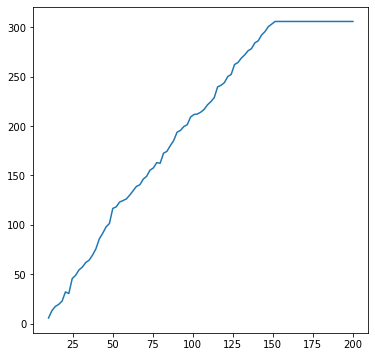

In [12]:
window_widths = np.linspace(10, 200, 91)
ics = np.zeros(window_widths.size)

for ii, fit_window_width in enumerate(window_widths):
    plane_pos, squared_residuals, n_data_points = focal_fitter.fit(fit_window=fit_window_width, fit_center=-50)
    #print(plane_pos, squared_residuals, n_data_points)
    ics[ii] = information_criterion(squared_residuals, 3, n_data_points, InformationCriteria.BIC)

fig2, ax1 = plt.subplots(1, 1, figsize=(6,6))
plt.sca(ax1)
print(ics)
plt.plot(window_widths, ics)

0.0019011806912597377
0.00451298305913096
(201, 101)
[-40.]


/data/numerik/people/bzfmanle/Python/miniconda3/envs/htc_env/lib/python3.9/site-packages/scipy/optimize/minpack.py:406: UserWarning: Warning: converting a masked element to nan.
  x0 = asarray(x0).flatten()


TypeError: Improper input: func input vector length N=3 must not exceed func output vector length M=0

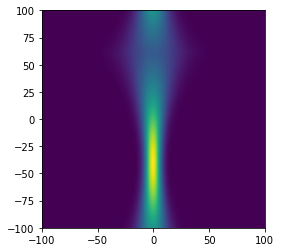

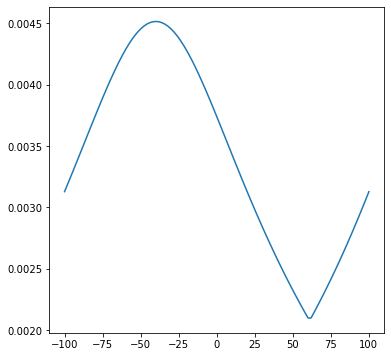

In [17]:
min_window_width = window_widths[np.where(np.isclose(ics, np.min(ics)))[0][0]]
print("min_window_width: {}".format(min_window_width))

best_window_width = focal_fitter.optimize_fit_window()
print("best_window_width: {}".format(best_window_width))
print("based on focus center: {}".format(focal_fitter.current_focus_estimate))
plt.sca(ax0)
plane_pos, squared_residuals, n_data_points = focal_fitter._fit_gaussian(fit_window=best_window_width,
                                                                         fit_center=focal_fitter.current_focus_estimate,
                                                                        plot=True)


#plane_pos, squared_residuals, n_data_points = focal_fitter._fit_gaussian(fit_window=min_window_width,
#                                                                         fit_center=-40, plot=True)

print(plane_pos)
plt.axvline(plane_pos)
#print(plane_pos)

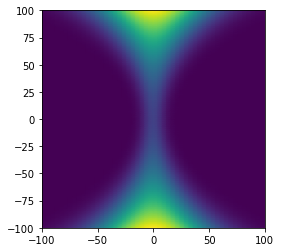

In [13]:
def gaussian(r, mean, std_dev):
    return np.exp( -(r-mean)**2/std_dev**2)

x = np.linspace(-100., 100., 51)
y = np.linspace(-100., 100., 51)

X, Y = np.meshgrid(x, y, indexing='ij')
R = np.sqrt(X**2 + Y**2)

z = np.linspace(-100., 100., 101)
std_per_z = np.abs(np.linspace(-np.sqrt(40), np.sqrt(40), 101))**2 + 10.


data = np.zeros((x.size, y.size, z.size))
for iz, z_val in enumerate(z):
    data[:, :, iz] = gaussian(R, 0, std_per_z[iz])

image1 = image2d.ImageStack2D(data, x, y, z)
#image1.set_mask('window','edge', 50.)
fig, ax0 = plt.subplots(1, 1, figsize=(4, 4))
#plot_image(ax0, image1.slice_z(z_value=0.))
im_stack_1d = image1.average_over_dimension()
plot_image_through_focus(ax0, im_stack_1d)


{'rms_dif': 1.0, 'max_dif': 1.0, 'squared_dif': 25.0, 'cubic_dif': 25.0}
too many values to unpack (expected 2)
too many values to unpack (expected 2)


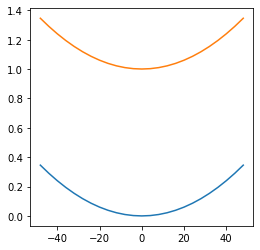

In [15]:
x = np.linspace(-100., 100., 51)
y = np.linspace(-100., 100., 51)

X, Y = np.meshgrid(x, y, indexing='ij')

data = 0.5*(3*x**2 - 1) / 100**2# - Y**2
data2 = 0.5*(3*x**2 - 1) / 100**2 + 1# - Y**2
z = 0.
image1 = image1d.Image1D(data, x, z)
image1.set_mask('window','edge', 50.)
image1.apply_mask()
image2 = image1d.Image1D(data2, x, z)
image2.set_mask('window','edge', 50.)
image2.apply_mask()
pixel_comp = image1.pixel_comparison(image2)
print(pixel_comp)

fig, ax0 = plt.subplots(1, 1, figsize=(4, 4))
plot_image(ax0, image1)
plot_image(ax0, image2)
#image.set_mask('window','edge', 100.)
#image.apply_mask()
#fit_output = image.fit_basis(BasisFunctions.LEGENDRE1D, 10)

51
101
{'rms_dif': 1.0, 'max_dif': 1.000000000000007, 'squared_dif': 2601.0, 'cubic_dif': 2601.0}


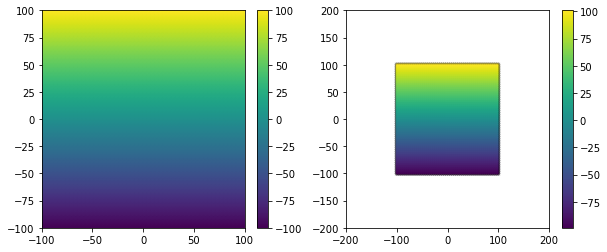

In [16]:
x1 = np.linspace(-100., 100., 51)
y1 = np.linspace(-100., 100., 51)
X1, Y1 = np.meshgrid(x1, y1, indexing='ij')

R1 = np.sqrt(X1**2 + Y1**2)
PHI1 = np.arctan2(Y1, X1)
data1 = R1 * np.sin(PHI1)

x2 = np.linspace(-200., 200., 101)
y2 = np.linspace(-200., 200., 101)
X2, Y2 = np.meshgrid(x2, y2, indexing='ij')

R2 = np.sqrt(X2**2 + Y2**2)
PHI2 = np.arctan2(Y2, X2)

data2 = R2 * np.sin(PHI2) + 1
print(x1.size)
print(x2.size)
z = 0.
image1 = image2d.Image2D(data1, x1, y1, z)
image2 = image2d.Image2D(data2, x2, y2, z)
image2.set_mask('rectangular', 'edge', np.array([100., 100.]))
#image2.apply_mask()
#image.set_mask('circular','edge', np.array([10., 12]))
#image.set_mask('circular','edge', 1.)
#image.apply_mask()
#fit_output = image.fit_basis(BasisFunctions.LEGENDRE2D, 200)
#fit_output = image.fit_basis(BasisFunctions.ZERNIKE, 10)
#for key, val in fit_output.items():
#    print(key, val)
#print(type(fit_output['projected_image']))
#print(type(fit_output['fitted_image']))
pixel_comp = image1.pixel_comparison(image2)
print(pixel_comp)

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(10, 4))

plot_image(ax0, image1)
plt.colorbar()
plot_image(ax1, image2)
plt.colorbar()


too many values to unpack (expected 2)


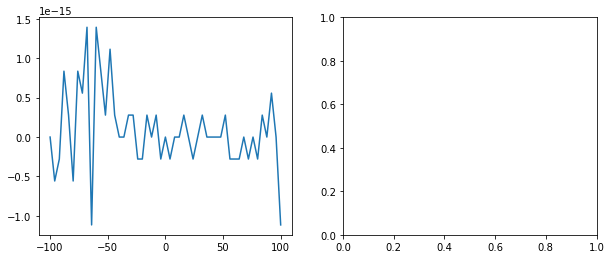

In [65]:
reduced_image = image1.average_over_dimension()
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(10, 4))

plot_image(ax0, reduced_image)

[-100.  -96.  -92.  -88.  -84.  -80.  -76.  -72.  -68.  -64.  -60.  -56.
  -52.  -48.  -44.  -40.  -36.  -32.  -28.  -24.  -20.  -16.  -12.   -8.
   -4.    0.    4.    8.   12.   16.   20.   24.   28.   32.   36.   40.
   44.   48.   52.   56.   60.   64.   68.   72.   76.   80.   84.   88.
   92.   96.  100.]
51


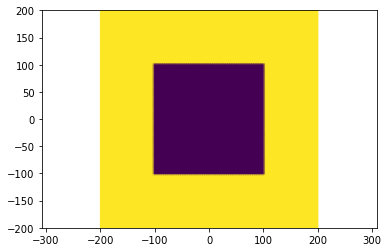

In [41]:
plt.pcolormesh(X2, Y2, image2.mask.current, shading='gouraud')
plt.axis('equal')

x_masked = np.unique(X2[np.logical_not(image2.mask.current)])
print(x_masked)
print(x_masked.size)

too many values to unpack (expected 2)
too many values to unpack (expected 2)
too many values to unpack (expected 2)
[ 4.99950000e-01  1.98727274e-17  1.00000000e+00  1.18469665e-17
  7.96152241e-17  5.96875327e-18 -3.25922259e-18  7.29145201e-17
 -1.52896322e-16  4.26621196e-17]


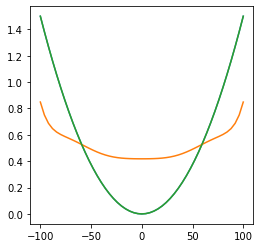

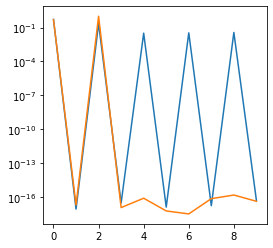

In [17]:
x = np.linspace(-100., 100., 51)
data = 0.5*(3*x**2 - 1) / 100**2# - Y**2
z = 0.
image = image1d.Image1D(data, x, z)
image.set_mask('window','edge', 100.)
image.apply_mask()
fit_output = image.fit_basis(BasisFunctions.LEGENDRE1D, 10)
#for key, val in fit_output.items():
#    print(key, val)

fig, ax0 = plt.subplots(1, 1, figsize=(4, 4))
plot_image(ax0, image)
plot_image(ax0, fit_output['projected_image'])
plot_image(ax0, fit_output['fitted_image'])

fig, ax = plt.subplots(1,1, figsize=(4, 4))
plt.semilogy(abs(fit_output['projected_coefficients']))
plt.semilogy(abs(fit_output['fitted_coefficients']))
print(fit_output['fitted_coefficients'])


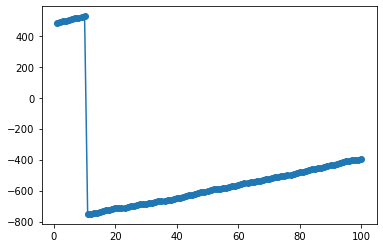

In [18]:
x = np.linspace(-1., 1., 201)
#data = x# - Y**2
noise = np.random.normal(0,0.01, 201)
data = (46189*x**10 - 109395*x**8 + 90090*x**6 - 30030*x**4 + 3465*x**2 -63)/256 + noise
#print(data)
z = 0.
image = image1d.Image1D(data, x, z)
image.set_mask('window','edge', 1.)
image.apply_mask()

modes = list(range(1, 101))

criterion = np.zeros(len(modes))

for ii, max_n_modes in enumerate(modes):
    crit = image._evalulate_info_criterion(BasisFunctions.LEGENDRE1D, max_n_modes, InformationCriteria.BIC)
    criterion[ii] = crit

plt.plot(modes, criterion, marker='o')
#plt.yscale('log')

In [19]:
modes_required = image.optimise_basis_size(BasisFunctions.LEGENDRE1D, 101, min_n_modes = 1,
                                           criterion=InformationCriteria.BIC)

print(modes_required)
#fit_output = image.fit_basis(BasisFunctions.LEGENDRE1D, modes_required)
#for ii, mode in enumerate(modes[:modes_required]):
#    print(mode, criterion[ii], fit_output['fitted_coefficients'][ii])

#fig, ax = plt.subplots(1,1, figsize=(4, 4))
#plt.semilogy(abs(fit_output['projected_coefficients']))
#plt.semilogy(abs(fit_output['fitted_coefficients']))

12


In [21]:
from scipy import optimize
def eggholder(x):
     return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
             -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']


     fun: -935.3379515604948
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 47
     nit: 2
   nlfev: 42
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097554, 453.97741501])
      xl: array([[439.48097554, 453.97741501]])

In [ ]:
fig, ax0 = plt.subplots(1, 1, figsize=(4, 4))
plot_image(ax0, image)
plot_image(ax0, fit_output['projected_image'])
plot_image(ax0, fit_output['fitted_image'])

fig, ax = plt.subplots(1,1, figsize=(4, 4))
plt.semilogy(abs(fit_output['projected_coefficients']))
plt.semilogy(abs(fit_output['fitted_coefficients']))

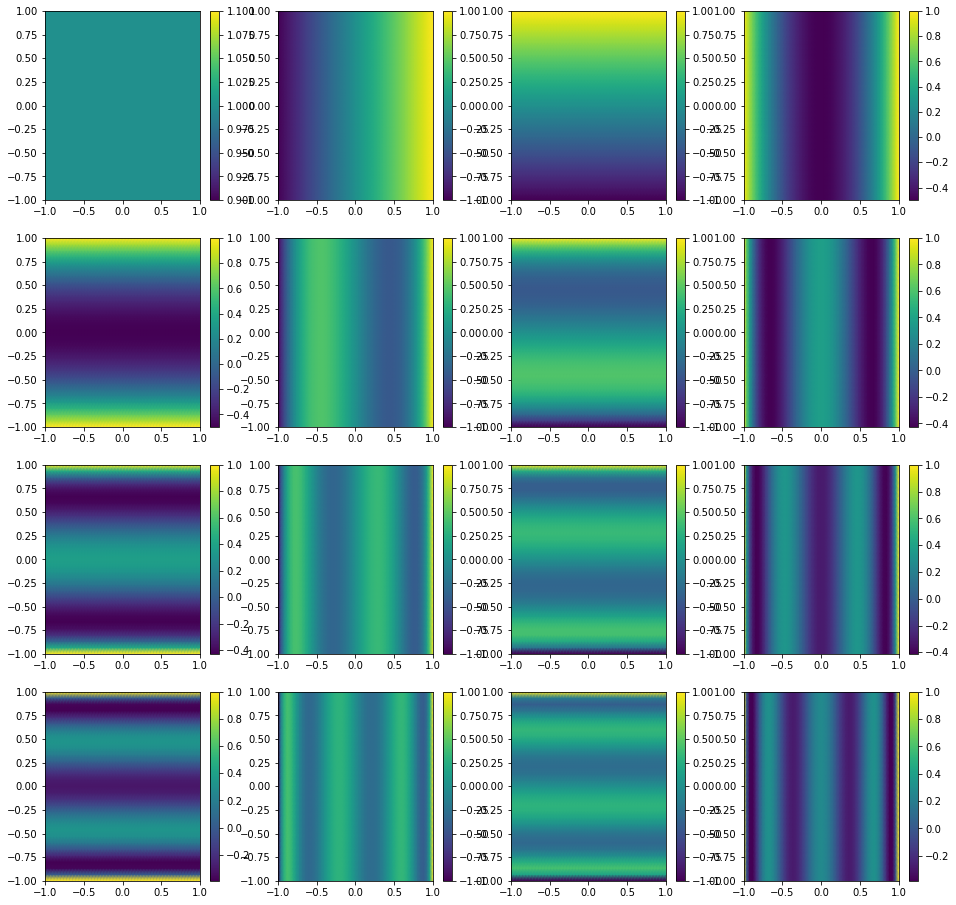

In [20]:
x = np.linspace(-1., 1., 51)
y = np.linspace(-1., 1., 31)
X, Y = np.meshgrid(x, y, indexing='ij')
#R = np.sqrt(X**2 + Y**2)
#PHI = np.arctan2(Y, X)
#data = R**2 #* np.sin(2*PHI)
#data = 550 - X**2# - Y**2
z = 0.
#image_stack = image2d.ImageStack2D.from_basis(BasisFunctions.LEGENDRE2D, 0, 15, x, y)
fig = plt.figure(figsize=(16, 16))
gs = GridSpec(4,4, figure=fig)

for mode in range(16):
    ax = fig.add_subplot(gs[mode])
    image = image2d.Image2D.from_basis(BasisFunctions.LEGENDRE2D, mode, x, y)
    #print(image.masked_data.shape)
    plot_image(ax, image)
    plt.colorbar()

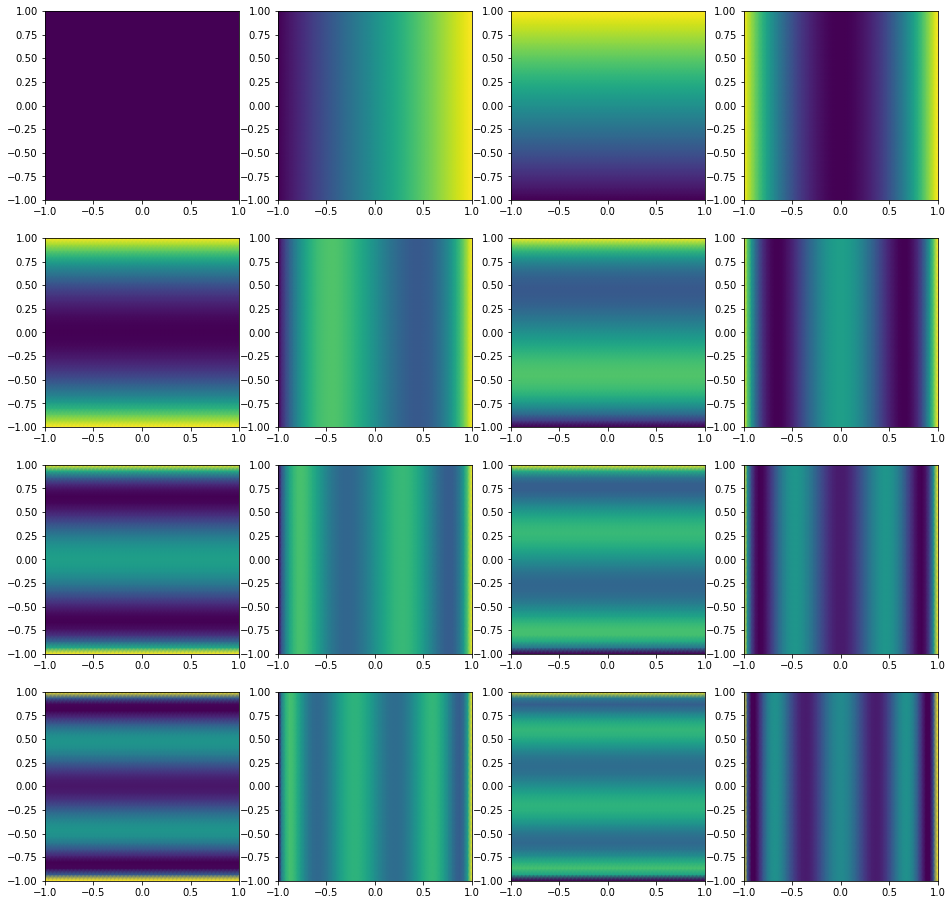

In [21]:
x = np.linspace(-1., 1., 51)
y = np.linspace(-1., 1., 31)
X, Y = np.meshgrid(x, y, indexing='ij')
#R = np.sqrt(X**2 + Y**2)
#PHI = np.arctan2(Y, X)
#data = R**2 #* np.sin(2*PHI)
#data = 550 - X**2# - Y**2
z = 0.
image_stack = image2d.ImageStack2D.from_basis(BasisFunctions.LEGENDRE2D, 0, 15, x, y)
fig = plt.figure(figsize=(16, 16))
gs = GridSpec(4,4, figure=fig)

for mode in range(image_stack.n_layers):
    ax = fig.add_subplot(gs[mode])
    plot_image(ax, image_stack.slice_z(z_index=mode))

j: 1, n: 0, m: 0
j: 2, n: 1, m: 1
j: 3, n: 1, m: -1


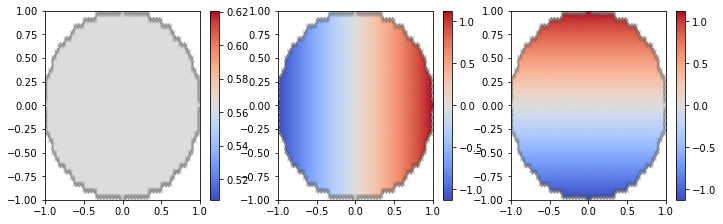

In [4]:
x = np.linspace(-1., 1., 51)
y = np.linspace(-1., 1., 31)
X, Y = np.meshgrid(x, y, indexing='ij')
#R = np.sqrt(X**2 + Y**2)
#PHI = np.arctan2(Y, X)
#data = R**2 #* np.sin(2*PHI)
#data = 550 - X**2# - Y**2
z = 0.
#image_stack = image2d.ImageStack2D.from_basis(BasisFunctions.LEGENDRE2D, 0, 15, x, y)
fig = plt.figure(figsize=(16, 16))
gs = GridSpec(4,4, figure=fig)
mpl.rc('image', cmap='coolwarm')
for mode in range(0,3):
    ax = fig.add_subplot(gs[mode])
    image = image2d.Image2D.from_basis(BasisFunctions.ZERNIKE, mode+1, x, y)    
    image.set_mask("circular","edge",1.0)
    image.apply_mask()
    #print(image.masked_data.shape)
    plot_image(ax, image)
    plt.colorbar()

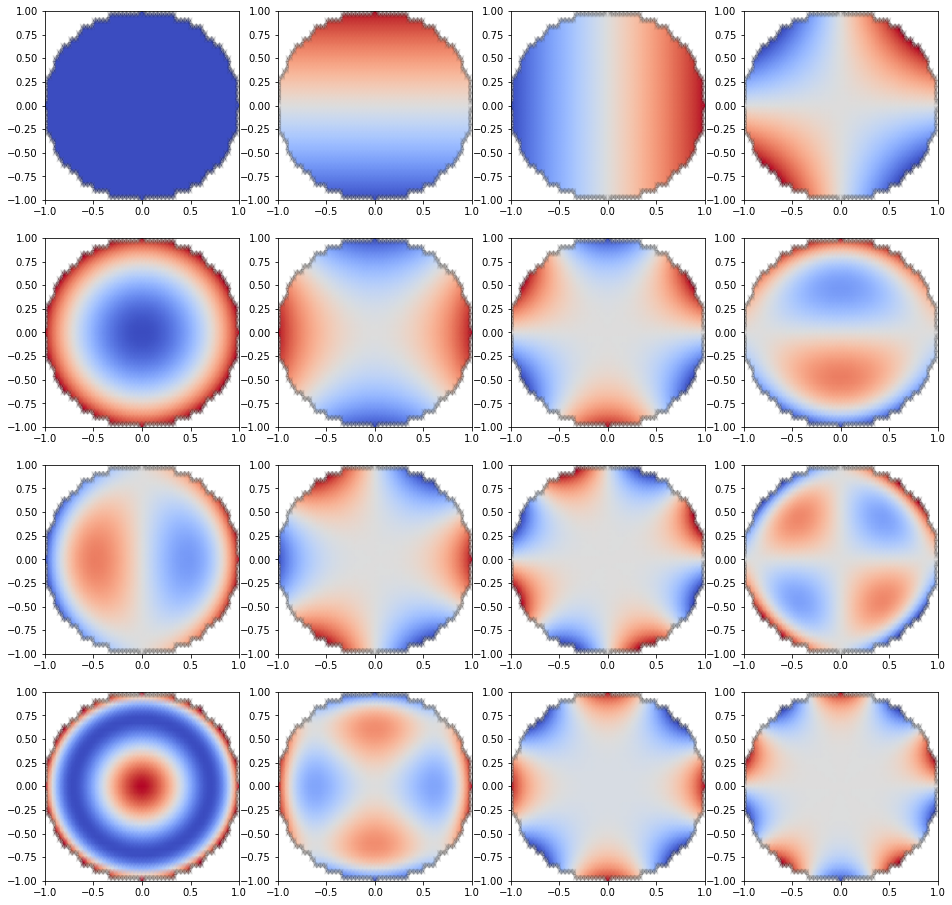

In [16]:
x = np.linspace(-1., 1., 51)
y = np.linspace(-1., 1., 31)
X, Y = np.meshgrid(x, y, indexing='ij')
#R = np.sqrt(X**2 + Y**2)
#PHI = np.arctan2(Y, X)
#data = R**2 #* np.sin(2*PHI)
#data = 550 - X**2# - Y**2
z = 0.
image_stack = image2d.ImageStack2D.from_basis(BasisFunctions.ZERNIKE_OSA, 1, 16, x, y)
image_stack.set_mask("circular","edge",1.0)
fig = plt.figure(figsize=(16, 16))
gs = GridSpec(4,4, figure=fig)
mpl.rc('image', cmap='coolwarm')
for mode in range(image_stack.n_layers):
    ax = fig.add_subplot(gs[mode])
    plot_image(ax, image_stack.slice_z(z_index=mode))

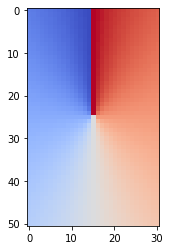

In [12]:
R, PHI = image_stack.get_cyl_dimensions()
plt.imshow(PHI)

j: 1, n: 0, m: 0
j: 2, n: 1, m: 1
j: 3, n: 1, m: -1
j: 4, n: 2, m: 0
j: 5, n: 2, m: 2
j: 6, n: 2, m: -2
j: 7, n: 3, m: 1
j: 8, n: 3, m: -1
j: 9, n: 4, m: 0
j: 10, n: 3, m: 3
[-8.32903889e-18 -1.32507437e-18  2.77745663e-01 -7.95044621e-18
  1.51437071e-18  2.42299313e-17 -9.70143734e-19 -7.39994606e-03
  8.04509438e-18  9.46481692e-19]
[ 8.88761746e-18  3.25799815e-19  8.86226925e-01 -3.41336023e-18
 -1.47197846e-18  7.72589000e-18 -6.76814844e-19 -3.42825876e-18
  1.88810087e-18 -1.85405357e-18]


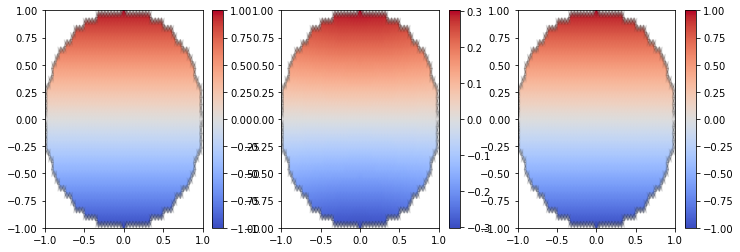

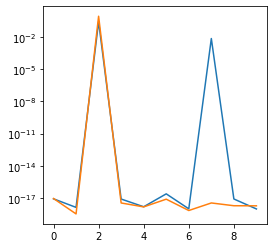

In [28]:
x = np.linspace(-1., 1., 51)
y = np.linspace(-1., 1., 31)
X, Y = np.meshgrid(x, y, indexing='ij')
R = np.sqrt(X**2 + Y**2)
PHI = np.arctan2(Y, X)
data = R * np.sin(PHI)
#data = 550 - X**2# - Y**2
z = 0.
image = image2d.Image2D(data, x, y, z)
#image.set_mask('circular','edge', np.array([10., 12]))
image.set_mask('circular','edge', 1.)
image.apply_mask()
#fit_output = image.fit_basis(BasisFunctions.LEGENDRE2D, 200)
fit_output = image.fit_basis(BasisFunctions.ZERNIKE, 10)
#for key, val in fit_output.items():
#    print(key, val)
#print(type(fit_output['projected_image']))
#print(type(fit_output['fitted_image']))
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize=(12, 4))

plot_image(ax0, image)
plt.colorbar()
plot_image(ax1, fit_output['projected_image'])
plt.colorbar()
plot_image(ax2, fit_output['fitted_image'])
plt.colorbar()

fig, ax = plt.subplots(1,1, figsize=(4, 4))
print(fit_output['projected_coefficients'])
print(fit_output['fitted_coefficients'])
plt.semilogy(abs(fit_output['projected_coefficients']))
plt.semilogy(abs(fit_output['fitted_coefficients']))

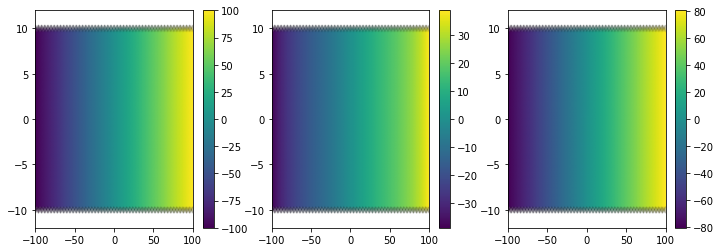

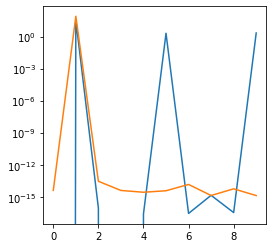

In [1]:
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
import os, sys
sys.path.append(os.path.join("..","src"))
from image_stack import image1d, image2d
from image_stack.basis_functions import BasisFunctions
from image_stack.canvas import plot_image

x = np.linspace(-100., 100., 51)
y = np.linspace(-12., 12., 31)
X, Y = np.meshgrid(x, y, indexing='ij')

data = X

image = image2d.Image2D(data, x, y, 0.)
image.set_mask('rectangular','edge', np.array([100., 10.]))
image.apply_mask()
#image = image2d.ImageStack2D.from_basis(BasisFunctions.LEGENDRE2D, 0, 10, x, y)
#image.set_mask('rectangular','edge', np.array([10., 12]))
#image.apply_mask()
fit_output = image.fit_basis(BasisFunctions.LEGENDRE2D, 10)
#for key, val in fit_output.items():
#    print(key, val)
#print(fit_output['projected_coefficients'])
#print(fit_output['fitted_coefficients'])
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize=(12, 4))
plot_image(ax0, image)
plt.colorbar()
plot_image(ax1, fit_output['projected_image'])
plt.colorbar()
plot_image(ax2, fit_output['fitted_image'])
plt.colorbar()

fig, ax = plt.subplots(1,1, figsize=(4, 4))
plt.semilogy(abs(fit_output['projected_coefficients']))
plt.semilogy(abs(fit_output['fitted_coefficients']))

j: 1, n: 0, m: 0
j: 2, n: 1, m: 1
j: 3, n: 1, m: -1
j: 4, n: 2, m: 0
j: 5, n: 2, m: 2
j: 6, n: 2, m: -2
j: 7, n: 3, m: 1
j: 8, n: 3, m: -1
j: 9, n: 4, m: 0
j: 10, n: 3, m: 3
j: 11, n: 3, m: -3
j: 12, n: 4, m: 2
j: 13, n: 4, m: -2
j: 14, n: 5, m: 1
j: 15, n: 5, m: -1
j: 16, n: 6, m: 0
j: 17, n: 4, m: 4
j: 18, n: 4, m: -4
j: 19, n: 5, m: 3
j: 20, n: 5, m: -3
[ 4.73233016e-14 -1.94117582e+02 -5.91541269e-15  3.54924762e-14
  4.14078889e-14  2.41390524e+01 -7.85047247e+01 -3.69713293e-15
  7.39426587e-14  4.29022115e+00  1.47885317e-15  8.28157777e-14
  1.97844984e+00 -1.59930734e+01 -4.89870114e-15  1.50843024e-13
  2.36616508e-14  3.92817575e-01  5.72945674e+00 -3.69713293e-15]
[ 1.55247832e-15 -5.90817950e+02  1.05797745e-15  2.63723975e-15
  3.24244049e-16  7.23601255e+01 -2.08885690e+02  1.50548112e-15
  2.15104941e-15  9.77483536e-15  4.34444808e-15 -1.54372658e-15
 -6.52541313e-17  6.69081658e-15  4.38396650e-15  8.87784343e-16
 -5.96779977e-15  2.73463942e-14  3.40395415e-15  5.571

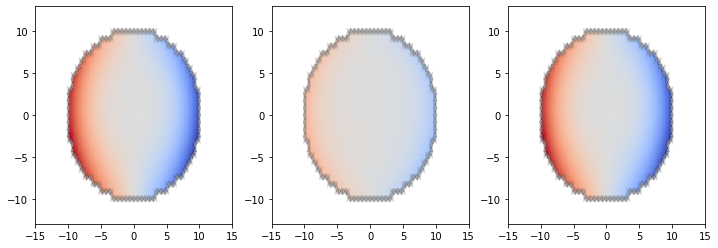

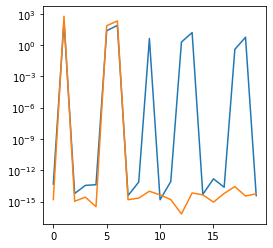

In [35]:
x = np.linspace(-15., 15., 51)
y = np.linspace(-13., 13., 31)
X, Y = np.meshgrid(x, y, indexing='ij')
R = np.sqrt(X**2 + Y**2)
PHI = np.arctan2(Y, X)
data = R**2 * np.sin(2*PHI) - R **3 *np.cos(PHI)
#data = 550 - X**2# - Y**2
z = 0.
image = image2d.Image2D(data, x, y, z)
#image.set_mask('circular','edge', np.array([10., 12]))
image.set_mask('circular','edge', 10.)
image.apply_mask()
#fit_output = image.fit_basis(BasisFunctions.LEGENDRE2D, 200)
fit_output = image.fit_basis(BasisFunctions.ZERNIKE, 20)
#for key, val in fit_output.items():
#    print(key, val)
#print(type(fit_output['projected_image']))
#print(type(fit_output['fitted_image']))
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize=(12, 4))

#plot_image(ax0, image, vmin=)
vmin = np.min(image.masked_data)
vmax = np.max(image.masked_data)
plt.sca(ax0)
plt.pcolormesh(X, Y, image.masked_data, shading='gouraud',
               vmin=vmin, vmax=vmax)
#plt.colorbar()
#plot_image(ax1, fit_output['projected_image'])
plt.sca(ax1)
plt.pcolormesh(X, Y, fit_output['projected_image'].masked_data, shading='gouraud',
               vmin=vmin, vmax=vmax)

#plt.colorbar()
plt.sca(ax2)
#plot_image(ax2, fit_output['fitted_image'])
plt.pcolormesh(X, Y, fit_output['fitted_image'].masked_data, shading='gouraud',
               vmin=vmin, vmax=vmax)
#plt.colorbar()

fig, ax = plt.subplots(1,1, figsize=(4, 4))
print(fit_output['projected_coefficients'])
print(fit_output['fitted_coefficients'])
plt.semilogy(abs(fit_output['projected_coefficients']))
plt.semilogy(abs(fit_output['fitted_coefficients']))
        

[3.42506667e+01 7.46252063e-15 4.04733333e+02 1.45208030e+01
 1.42711111e+00 0.00000000e+00 1.72523843e+02 1.35369168e+00
 1.56007690e+00 5.59689047e-15 8.62185221e+01 1.31469649e+00
 1.76684662e+00 8.39533571e-15 9.81050963e+01 1.24027698e+00
 2.03987613e+00 1.63242639e-14 1.12649485e+02 1.11188873e+00]
[ 3.03493067e+01 -2.61679756e-14  7.86452555e+02  4.56058278e+01
 -8.78313788e-01  6.20351115e-14  4.77942230e+02 -1.59327068e+01
 -3.10255648e+00  1.55340935e-12 -1.69002564e+02 -1.80403763e+01
 -6.27427058e+00 -1.11894589e-12 -2.99576179e+02  5.22481715e+00
  1.66150293e+00  1.80036103e-13  7.73136696e+01 -1.78405187e-01]


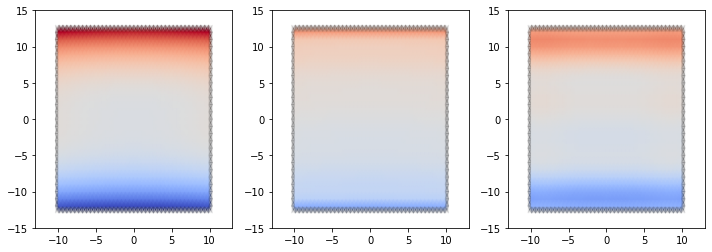

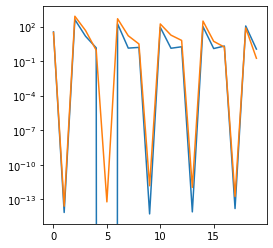

In [37]:
x = np.linspace(-13., 13., 51)
y = np.linspace(-15., 15., 31)
X, Y = np.meshgrid(x, y, indexing='ij')
#R = np.sqrt(X**2 + Y**2)
#PHI = np.arctan2(Y, X)
data = X**2 + Y**3 
#data = 550 - X**2# - Y**2
z = 0.
image = image2d.Image2D(data, x, y, z)
image.set_mask('rectangular','edge', np.array([10., 12]))
#image.set_mask('circular','edge', 1.)
image.apply_mask()
#fit_output = image.fit_basis(BasisFunctions.LEGENDRE2D, 200)
fit_output = image.fit_basis(BasisFunctions.LEGENDRE2D, 20)
#for key, val in fit_output.items():
#    print(key, val)
#print(type(fit_output['projected_image']))
#print(type(fit_output['fitted_image']))
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize=(12, 4))

#plot_image(ax0, image, vmin=)
vmin = np.min(image.masked_data)
vmax = np.max(image.masked_data)
plt.sca(ax0)
plt.pcolormesh(X, Y, image.masked_data, shading='gouraud',
               vmin=vmin, vmax=vmax)
#plt.colorbar()
#plot_image(ax1, fit_output['projected_image'])
plt.sca(ax1)
plt.pcolormesh(X, Y, fit_output['projected_image'].masked_data, shading='gouraud',
               vmin=vmin, vmax=vmax)

#plt.colorbar()
plt.sca(ax2)
#plot_image(ax2, fit_output['fitted_image'])
plt.pcolormesh(X, Y, fit_output['fitted_image'].masked_data, shading='gouraud',
               vmin=vmin, vmax=vmax)
#plt.colorbar()

fig, ax = plt.subplots(1,1, figsize=(4, 4))
print(fit_output['projected_coefficients'])
print(fit_output['fitted_coefficients'])
plt.semilogy(abs(fit_output['projected_coefficients']))
plt.semilogy(abs(fit_output['fitted_coefficients']))
        

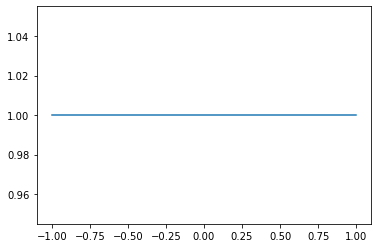

In [18]:
plt.plot(line.x, line.data)

In [6]:
a = np.arange(10)
index = np.where(a==3.0)
len(index[0])

1

In [16]:
x = np.linspace(-1., 1.,51)
data = np.vstack([x**2, x**3]).T
print(data.shape)

(51, 2)


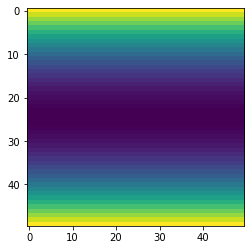

In [32]:
x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
X, Y = np.meshgrid(x,y)
f = X**2 + Y**2
im = image.Image2D.from_basis(basis_functions.legendre2D, 5, X, Y)

plt.imshow(im.masked_data)

In [23]:
n_min = 1
n_max = 10
n_modes = n_max-n_min
print(n_modes)
data = np.zeros((1, n_modes+1))
#dimension1 = x
#len_x = x.size
modes = np.array(list(range(n_min, n_max+1)), dtype=np.int64)
print(modes)
for ii, mode in enumerate(modes):
    print(ii, mode)
    data[0, ii] = mode
print(data)

9
[ 1  2  3  4  5  6  7  8  9 10]
0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]
